In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('states_all.csv')

In [3]:
#orjinal halini saklı tutarak interpolate edilmiş halini yeni veri cercevesine aktardık.
df_polate=df.interpolate()

In [17]:
#soru1
#tek degiskenli analiz ile veriyi anlamaya calısalim.
#info ile kaç değişkenimiz var ,kaç gözlemimiz var olduğuna ve türlerine bakalım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [18]:
#verimizin nekadarı eksik ona bakalım.
df.isnull().sum()*100/df.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [19]:
#primary key ve state kolonları kategorik diğerleri sürekli değişkenler.
#tanımlayıcı istatistik bilgilerine bakalım.
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


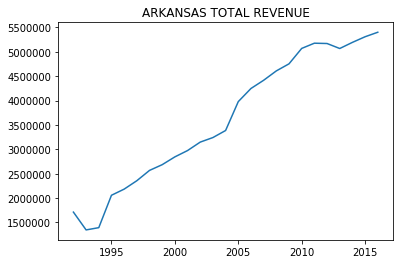

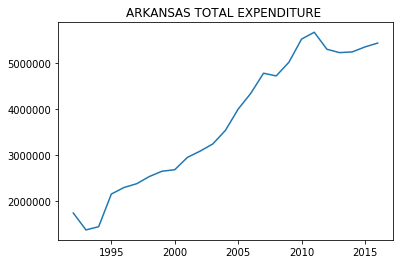

In [4]:
#soru2
#Arkansas eyaletini ele alalım
state=df[df_polate['STATE']=='ARKANSAS']
plt.plot(state['YEAR'],state['TOTAL_REVENUE'])
plt.title('ARKANSAS TOTAL REVENUE')
plt.show()

plt.plot(state['YEAR'],state['TOTAL_EXPENDITURE'])
plt.title('ARKANSAS TOTAL EXPENDITURE ')
plt.show()



In [5]:
#Toplam gelirin dip yaptığı yıla bakalım
state[state['TOTAL_REVENUE']==state['TOTAL_REVENUE'].min()]['YEAR']

54    1993
Name: YEAR, dtype: int64

In [6]:
#Toplam gelirin zirve yaptığı yıla bakalım
state[state['TOTAL_REVENUE']==state['TOTAL_REVENUE'].max()]['YEAR']

1232    2016
Name: YEAR, dtype: int64

In [7]:
#Toplam harcamanın dip yaptığı yıla bakalım
state[state['TOTAL_EXPENDITURE']==state['TOTAL_EXPENDITURE'].min()]['YEAR']

54    1993
Name: YEAR, dtype: int64

In [8]:
#Toplam harcamanın zirve yaptığı yıla bakalım
state[state['TOTAL_EXPENDITURE']==state['TOTAL_EXPENDITURE'].max()]['YEAR']

977    2011
Name: YEAR, dtype: int64

In [9]:
#soru3
state.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,NaN,NaN,NaN,NaN
105,1994_ARKANSAS,ARKANSAS,1994,312695.0,1393287.0,132108.0,810396.0,450783.0,1445984.0,816270.0,...,34488.0,36437.0,27161.0,279964.0,127437.0,409053.0,NaN,NaN,NaN,NaN
156,1995_ARKANSAS,ARKANSAS,1995,447757.0,2057550.0,197556.0,1244457.0,615537.0,2155067.0,1211057.0,...,33955.0,36696.0,27083.0,281900.0,129863.0,413288.0,NaN,NaN,NaN,NaN
207,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590


In [10]:
#eyaletimizdeki 4. ve 8. sınıf matematik ve okuma derslerinin ortalamalarına bakarak başarıyı yorumlayalım.
#sınıf bazında 8ler 4 lerden daha başarılı ve ders bazında da matematik dersinde okumaya göre daha başarılılar. 
state[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].mean()

AVG_MATH_4_SCORE       229.967542
AVG_MATH_8_SCORE       270.223956
AVG_READING_4_SCORE    214.858589
AVG_READING_8_SCORE    263.808900
dtype: float64

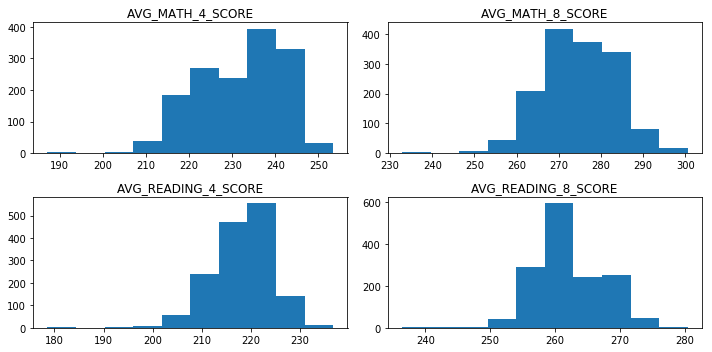

In [16]:
#soru4
#matematik ve okuma derslerinin dagilimina bakalım.baktığımız veriler interpolate ile eksikleri doldurulmuş veriler.
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(df_polate['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE')


plt.subplot(2,2,2)
plt.hist(df_polate['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(df_polate['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(df_polate['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE')
plt.tight_layout()
plt.show()

In [12]:
#soru5
#istenen kolonlardaki eksik verileri orjinal veri cercevesinde 3 farklı sekilde doldurup bakalım.
columns=['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
for i in columns:
    df_mean=df.fillna(df[i].mean())
    df_median=df.fillna(df[i].median())
    df_interpol=df.fillna(df[i].interpolate())

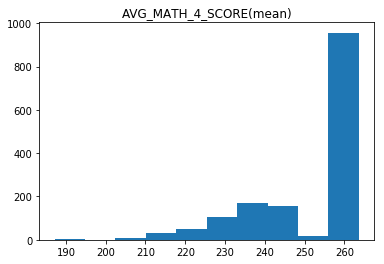

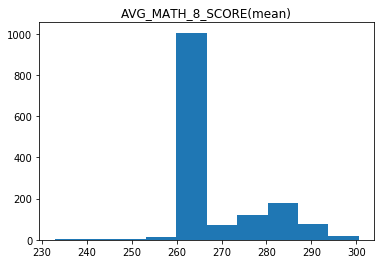

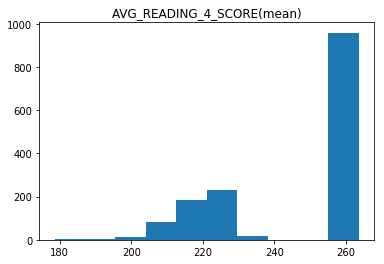

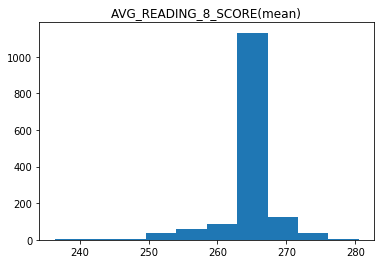

In [13]:
for i in columns:
    plt.hist(df_mean[i])
    plt.title(i+'(mean)')
    plt.show()

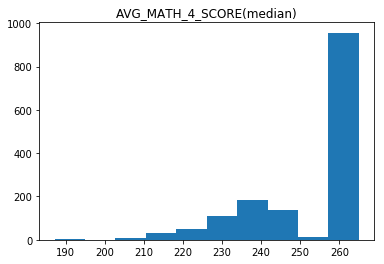

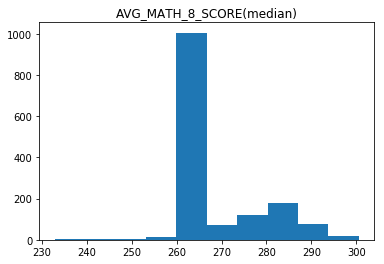

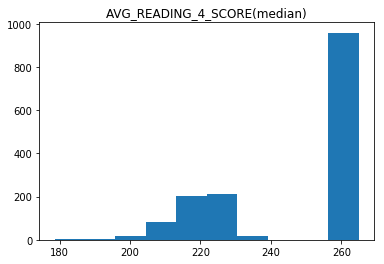

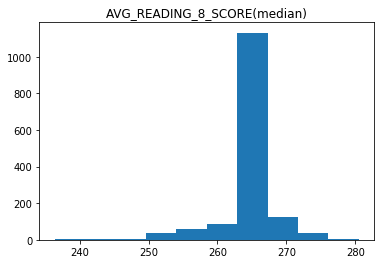

In [14]:
for i in columns:
    plt.hist(df_median[i])
    plt.title(i+'(median)')
    plt.show()

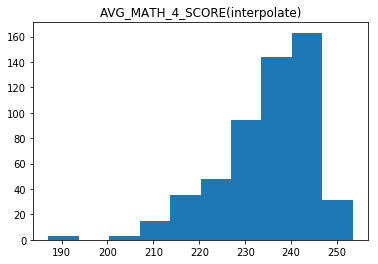

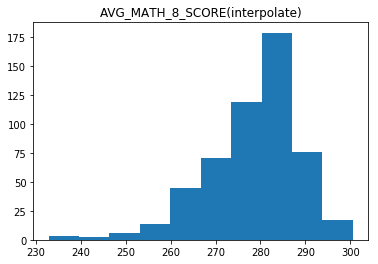

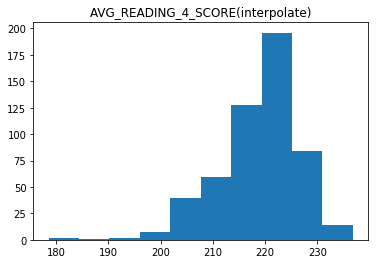

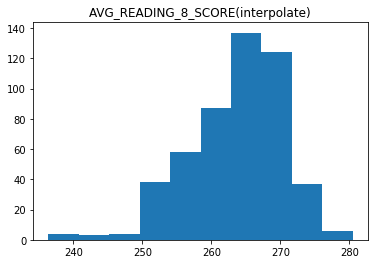

In [15]:
for i in columns:
    plt.hist(df_interpol[i])
    plt.title(i+'(interpolate)')
    plt.show()

In [ ]:
Eksiklerim ve sorularım:
1)En sondaki farklı eksik veri doldurma yöntemlerinin etkisini yorumlamadım.